## Read the data

In [1]:
import pandas as pd

df = pd.read_csv('1) iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Preprocess of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Exploratory Data Analysis (EDA)

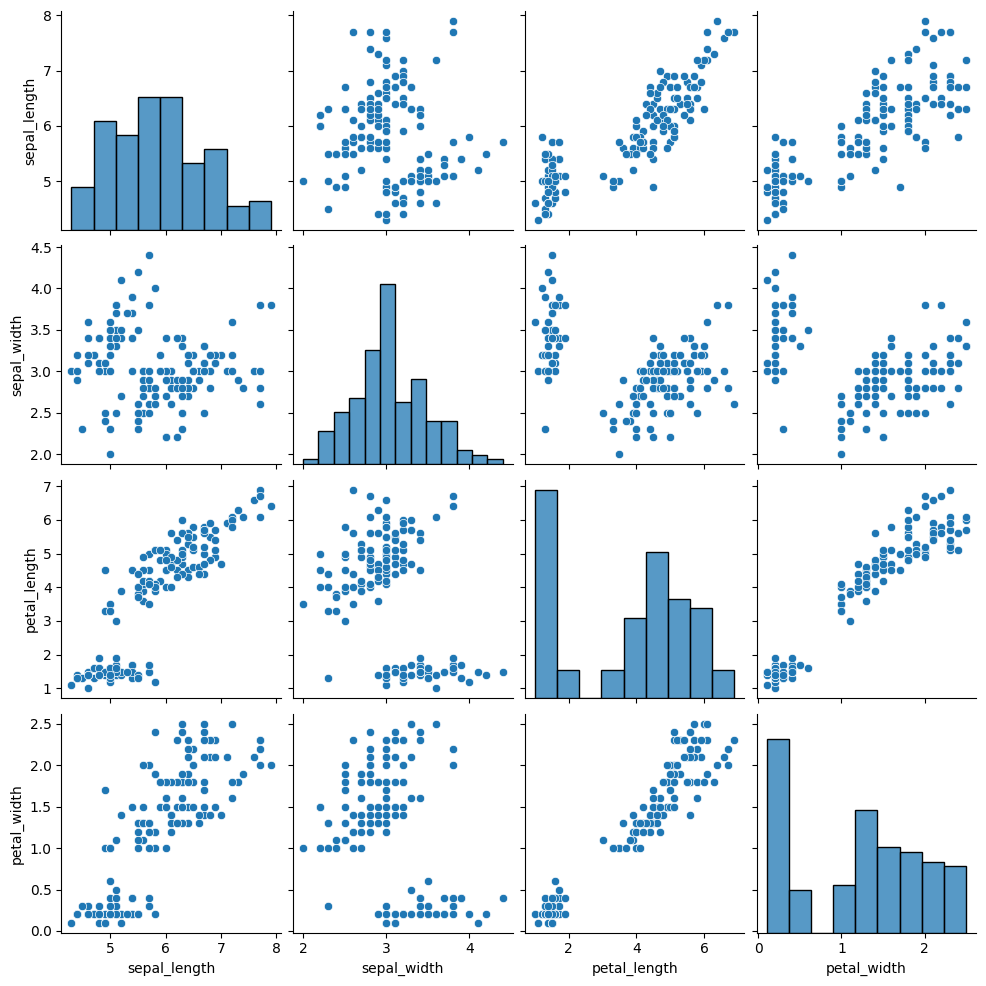

In [5]:
import seaborn as sns
sns.pairplot(df)

<Axes: xlabel='species', ylabel='count'>

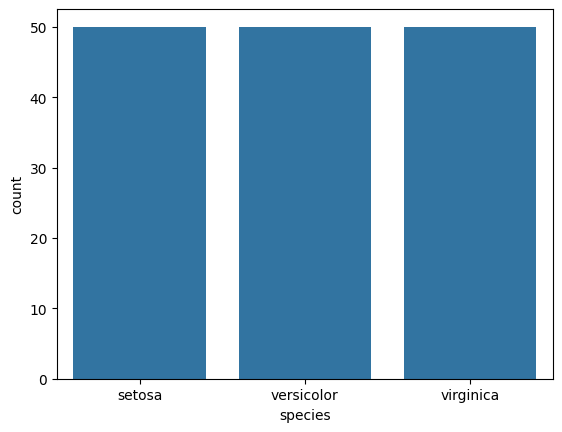

In [6]:
sns.countplot(x='species', data=df)

<Axes: >

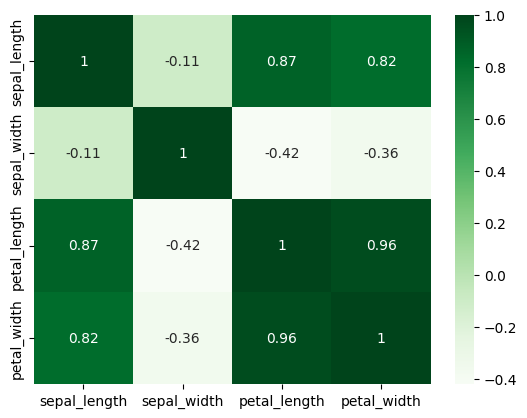

In [38]:
sns.heatmap(df.corr(numeric_only=True), annot=True , cmap='Greens')

### Now we understand that the data has:
 . No null values
 . Balanced
 . Great correlation

## Now we prepare the data for machine learning tasks
 . normalize the numeric values using standard scaler
 . encode the categorical values using label encoder

In [39]:
X = df.drop('species',axis=1)
Y = df['species']

In [40]:
# Scale numerica values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [41]:
# Encode the target values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

## Split the data for Train and Test

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

## Train the data using ML

In [43]:
from sklearn.metrics import r2_score , classification_report , confusion_matrix , mean_squared_error

def evaluate_model(model , x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = model.score(x_test, y_test)
    r2 = r2_score(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)

    print('Accuracy:', score)
    print('R2:', r2)
    print('MSE:', MSE)
    try :
        print(classification_report(y_test, y_pred))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Greens')
    except :
        pass


In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
evaluate_model(lr, x_train, y_train, x_test, y_test)

Accuracy: 0.9440499084897118
R2: 0.9440499084897118
MSE: 0.038792063447133145


Accuracy: 1.0
R2: 1.0
MSE: 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



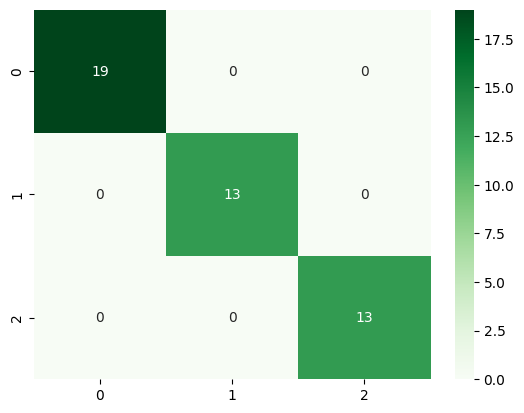

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
lr = LogisticRegression()
evaluate_model(lr, x_train, y_train, x_test, y_test)

Accuracy: 1.0
R2: 1.0
MSE: 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



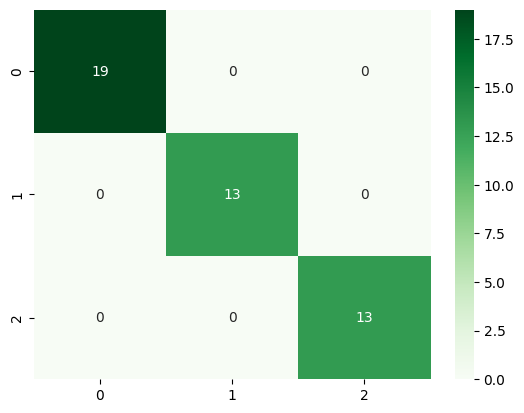

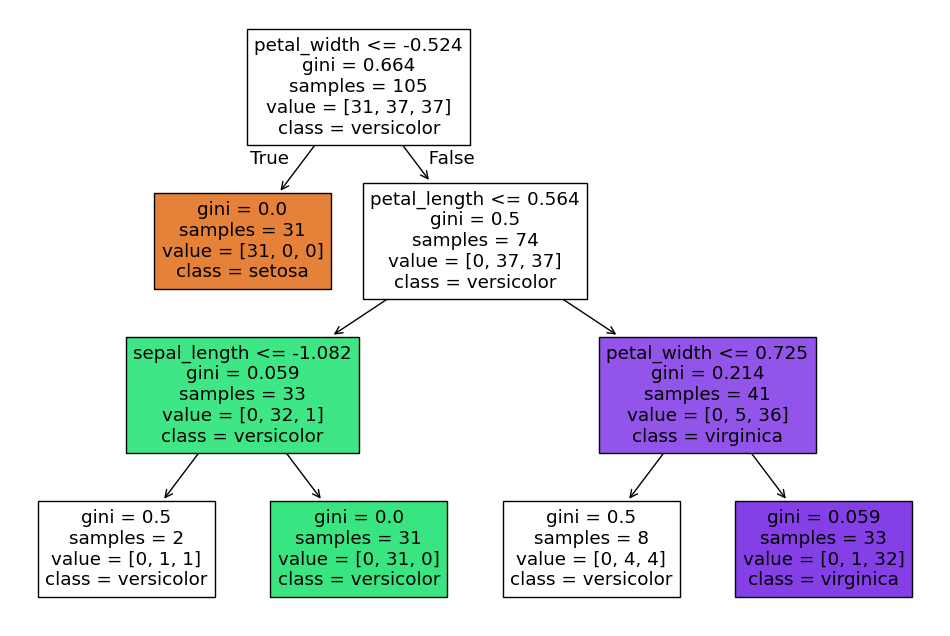

In [46]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
import matplotlib.pyplot as plt
dt = DecisionTreeClassifier(max_depth=3,min_samples_split=4,min_samples_leaf=2)
evaluate_model(dt, x_train, y_train, x_test, y_test)

feature_names = df.drop('species',axis=1).columns
class_names = df['species'].unique()
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()